In [170]:
import numpy as np
import pandas as pd
import sdv
import os
from sklearn.impute import KNNImputer
from numpy import isnan
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [171]:
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

In [172]:
directory = 'uploads' 
file_list=os.listdir(directory)
for filename in file_list:
    file_path=os.path.join(directory,filename)
    try:
        if filename.endswith('.csv'):
            df = pd.read_csv(file_path)
    except Exception as e:
        print(f"An error occurred while processing {filename} : {e}")
df2=df.dropna(how='all')
df2

,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,ADDRESS_LINE1,...,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID
0,A00003822,PLC00008468,23-06-2015,16-05-2020,21-05-2020,Health,157.13,9000,Christopher Demarest,7701 West Saint John Road,...,A,Major Loss,Police,0,1,GA,Savannah,4,AGENT00413,VNDR00556
1,A00008149,PLC00009594,21-04-2018,13-05-2020,18-05-2020,Property,141.71,26000,Ricardo Gatlin,8595 West 81st Drive,...,A,Total Loss,Ambulance,1,0,AL,Montgomery,0,AGENT00769,VNDR00592
2,A00003172,PLC00007969,03-10-2019,21-05-2020,26-05-2020,Property,157.24,13000,Lashawn Engles,637 Britannia Drive,...,A,Total Loss,Police,0,1,CO,Grand Junction,19,AGENT00883,VNDR00031
3,A00007572,PLC00009292,29-11-2016,14-05-2020,19-05-2020,Health,172.87,16000,Steven Bassett,2803 River Drive,...,A,Minor Loss,Ambulance,0,0,GA,Savannah,12,AGENT00278,VNDR00075
4,A00008173,PLC00000204,26-12-2011,17-05-2020,22-05-2020,Travel,88.53,3000,Jason Rodriguez,7573 National Drive,...,A,Major Loss,Police,0,1,TN,Nashville,18,AGENT00636,VNDR00472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,A00006029,PLC00007245,11-04-2014,25-06-2021,26-06-2021,Motor,105.75,1000,Patrick Hauman,126 Marjorie Lane,...,A,Minor Loss,Ambulance,1,1,CT,Manchester,0,AGENT00779,NaN
9996,A00003555,PLC00002590,25-08-2015,12-06-2021,17-06-2021,Life,64.59,67000,Paula Noel,501 West Maple Street,...,A,Total Loss,Police,1,0,MA,Worcester,6,AGENT00254,VNDR00598
9997,A00004230,PLC00006613,11-10-2018,18-06-2021,23-06-2021,Health,183.50,8000,Luis Clark,10980 Splendor Loop,...,A,Major Loss,NaN,1,1,OK,Oklahoma City,12,AGENT00786,VNDR00104
9998,A00006694,PLC00001781,29-01-2016,16-06-2021,21-06-2021,Motor,113.46,2000,Ryan Gordon,19 Heritage,...,A,Total Loss,Ambulance,0,1,AR,Fayetteville,6,AGENT00927,VNDR00185


In [173]:
number=len(df2.index)
print(number)

10000


In [174]:
label_encoder = LabelEncoder()
label_mappings = {}

for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = df2[col].fillna('None')  # Filling NaN values with a string for label encoding to work
        df2[col] = label_encoder.fit_transform(df2[col])
        label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    if df2[col].dtype == 'datetime64[ns]':
        df2[col] = df2[col].astype('int64')

num_arr = df2.values

imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputed_array = imputer.fit_transform(num_arr)

# Convert the NumPy array back to a DataFrame
df2_imputed = pd.DataFrame(imputed_array, columns=df2.columns)

# Inverse transforming the encoded columns back to their original categorical form
for col in df2_imputed.columns:
    if col in label_mappings:
        df2_imputed[col] = df2_imputed[col].map({v: k for k, v in label_mappings[col].items()})

# Converting the 'datetime64[ns]' columns back to their original form
for col in df2_imputed.columns:
    if df2_imputed[col].dtype == 'int64':
        df2_imputed[col] = pd.to_datetime(df2_imputed[col])


In [175]:
df2=df2_imputed
df2
directory='outputs'
output_file_path = os.path.join(directory, 'transformed.csv')
# Save the DataFrame as a CSV file in the output directory
df2.to_csv(output_file_path, index=False)

In [176]:
#Splitting the dataframe into information and Miscellaneous
info=df2.iloc[ : ,[2,3,4,5,6,7,15,16,17,18,19,20,21,22,25,26,27,28,29,30,33]]
misc=df2.iloc[ : ,[0,1,8,9,10,11,12,13,14,23,24,31,32,34,35]]

In [177]:
info

,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,...,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,CUSTOMER_EDUCATION_LEVEL,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_HOUR_OF_THE_DAY
0,23-06-2015,16-05-2020,21-05-2020,Health,157.13,9000.0,Y,54.0,89.0,Y,...,L,Own,LI,Bachelor,A,Major Loss,Police,0.0,1.0,4.0
1,21-04-2018,13-05-2020,18-05-2020,Property,141.71,26000.0,N,61.0,80.0,Y,...,L,Rent,MI,Bachelor,A,Total Loss,Ambulance,1.0,0.0,0.0
2,03-10-2019,21-05-2020,26-05-2020,Property,157.24,13000.0,N,47.0,68.0,Y,...,L,Rent,MI,PhD,A,Total Loss,Police,0.0,1.0,19.0
3,29-11-2016,14-05-2020,19-05-2020,Health,172.87,16000.0,Y,36.0,16.0,Y,...,L,Mortgage,MI,Masters,A,Minor Loss,Ambulance,0.0,0.0,12.0
4,26-12-2011,17-05-2020,22-05-2020,Travel,88.53,3000.0,Y,51.0,16.0,Y,...,M,Rent,HI,Masters,A,Major Loss,Police,0.0,1.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,11-04-2014,25-06-2021,26-06-2021,Motor,105.75,1000.0,N,45.0,98.0,Y,...,M,Own,MI,PhD,A,Minor Loss,Ambulance,1.0,1.0,0.0
9996,25-08-2015,12-06-2021,17-06-2021,Life,64.59,67000.0,Y,52.0,92.0,Y,...,L,Mortgage,LI,Masters,A,Total Loss,Police,1.0,0.0,6.0
9997,11-10-2018,18-06-2021,23-06-2021,Health,183.50,8000.0,Y,53.0,32.0,Y,...,M,Mortgage,LI,Bachelor,A,Major Loss,None,1.0,1.0,12.0
9998,29-01-2016,16-06-2021,21-06-2021,Motor,113.46,2000.0,Y,61.0,44.0,Y,...,M,Rent,MI,Bachelor,A,Total Loss,Ambulance,0.0,1.0,6.0


In [178]:
misc

,CUSTOMER_ID,POLICY_NUMBER,CUSTOMER_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,SSN,ROUTING_NUMBER,ACCT_NUMBER,INCIDENT_STATE,INCIDENT_CITY,AGENT_ID,VENDOR_ID
0,A00003822,PLC00008468,Christopher Demarest,7701 West Saint John Road,#2010,Glendale,AZ,85308.0,087-11-1946,109134974.0,HXJP58258181908465,GA,Savannah,AGENT00413,VNDR00556
1,A00008149,PLC00009594,Ricardo Gatlin,8595 West 81st Drive,None,Arvada,CO,80005.0,685-33-3536,40125819.0,JUND46859540983731,AL,Montgomery,AGENT00769,VNDR00592
2,A00003172,PLC00007969,Lashawn Engles,637 Britannia Drive,None,Vallejo,CA,94591.0,378-36-0672,99513168.0,WGZZ90128415227650,CO,Grand Junction,AGENT00883,VNDR00031
3,A00007572,PLC00009292,Steven Bassett,2803 River Drive,None,Thunderbolt,GA,31404.0,669-92-1861,18429110.0,WIKE91555436351397,GA,Savannah,AGENT00278,VNDR00075
4,A00008173,PLC00000204,Jason Rodriguez,7573 National Drive,None,Livermore,CA,94550.0,703-40-1033,70752391.0,VYJW71311537294027,TN,Nashville,AGENT00636,VNDR00472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,A00006029,PLC00007245,Patrick Hauman,126 Marjorie Lane,C,Manchester,CT,6042.0,711-20-5046,89109346.0,FIDL48830187432471,CT,Manchester,AGENT00779,None
9996,A00003555,PLC00002590,Paula Noel,501 West Maple Street,#203,Fayetteville,AR,72701.0,069-65-6089,89666038.0,ZWBN24881448170175,MA,Worcester,AGENT00254,VNDR00598
9997,A00004230,PLC00006613,Luis Clark,10980 Splendor Loop,None,Anchorage,AK,99577.0,743-01-9480,34475591.0,ACXF69390753250566,OK,Oklahoma City,AGENT00786,VNDR00104
9998,A00006694,PLC00001781,Ryan Gordon,19 Heritage,None,Oakland,CA,94605.0,574-84-6660,59003728.0,QNEI58902443815498,AR,Fayetteville,AGENT00927,VNDR00185


In [179]:
metadata  = SingleTableMetadata()
metadata.detect_from_dataframe(data = info)

c:\Users\sayuj\OneDrive\Desktop\Synthetic_code_generation\task1\venv\Lib\site-packages\sdv\utils.py:39: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

c:\Users\sayuj\OneDrive\Desktop\Synthetic_code_generation\task1\venv\Lib\site-packages\sdv\utils.py:39: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

c:\Users\sayuj\OneDrive\Desktop\Synthetic_code_generation\task1\venv\Lib\site-packages\sdv\utils.py:39: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [180]:
synthesizer = CTGANSynthesizer(
    
    metadata, # required
    enforce_rounding=True,
    enforce_min_max_values=True,
    epochs=2,
    verbose=True
)

In [181]:
metadata = synthesizer.get_metadata()
metadata

{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "POLICY_EFF_DT": {
            "sdtype": "datetime",
            "datetime_format": "%d-%m-%Y"
        },
        "LOSS_DT": {
            "sdtype": "datetime",
            "datetime_format": "%d-%m-%Y"
        },
        "REPORT_DT": {
            "sdtype": "datetime",
            "datetime_format": "%d-%m-%Y"
        },
        "INSURANCE_TYPE": {
            "sdtype": "categorical"
        },
        "PREMIUM_AMOUNT": {
            "sdtype": "numerical"
        },
        "CLAIM_AMOUNT": {
            "sdtype": "numerical"
        },
        "MARITAL_STATUS": {
            "sdtype": "categorical"
        },
        "AGE": {
            "sdtype": "numerical"
        },
        "TENURE": {
            "sdtype": "numerical"
        },
        "EMPLOYMENT_STATUS": {
            "sdtype": "categorical"
        },
        "NO_OF_FAMILY_MEMBERS": {
            "sdtype": "categorical"
        },
        "RISK_SEGMENT

In [182]:
python_dict = metadata.to_dict()
metadata.validate()
# only metadata of id format can be set as primary key

# metadata.set_primary_key(column_name='SSN')

# update all metadata depending on type of change needed 
# The SDV models can use the Python Faker library for new data types. You can input any of the function names as sdtypes.
# For example, inputting the sdtype first_name will use this function to generate meaningful first names. 
metadata.update_column(
    column_name='ANY_INJURY',
    sdtype='categorical',
)
metadata.update_column(
    column_name='POLICE_REPORT_AVAILABLE',
    sdtype='categorical',
)
metadata.update_column(
    column_name='INCIDENT_HOUR_OF_THE_DAY',
    sdtype='numerical',
    computer_representation = "UInt8",
)
metadata

{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "POLICY_EFF_DT": {
            "sdtype": "datetime",
            "datetime_format": "%d-%m-%Y"
        },
        "LOSS_DT": {
            "sdtype": "datetime",
            "datetime_format": "%d-%m-%Y"
        },
        "REPORT_DT": {
            "sdtype": "datetime",
            "datetime_format": "%d-%m-%Y"
        },
        "INSURANCE_TYPE": {
            "sdtype": "categorical"
        },
        "PREMIUM_AMOUNT": {
            "sdtype": "numerical"
        },
        "CLAIM_AMOUNT": {
            "sdtype": "numerical"
        },
        "MARITAL_STATUS": {
            "sdtype": "categorical"
        },
        "AGE": {
            "sdtype": "numerical"
        },
        "TENURE": {
            "sdtype": "numerical"
        },
        "EMPLOYMENT_STATUS": {
            "sdtype": "categorical"
        },
        "NO_OF_FAMILY_MEMBERS": {
            "sdtype": "categorical"
        },
        "RISK_SEGMENT

In [183]:
#Auto assigning the transformers
synthesizer.auto_assign_transformers(info)
synthesizer.get_transformers()

{'POLICY_EFF_DT': UnixTimestampEncoder(datetime_format='%d-%m-%Y', enforce_min_max_values=True),
 'LOSS_DT': UnixTimestampEncoder(datetime_format='%d-%m-%Y', enforce_min_max_values=True),
 'REPORT_DT': UnixTimestampEncoder(datetime_format='%d-%m-%Y', enforce_min_max_values=True),
 'INSURANCE_TYPE': None,
 'PREMIUM_AMOUNT': FloatFormatter(learn_rounding_scheme=True, enforce_min_max_values=True),
 'CLAIM_AMOUNT': FloatFormatter(learn_rounding_scheme=True, enforce_min_max_values=True),
 'MARITAL_STATUS': None,
 'AGE': FloatFormatter(learn_rounding_scheme=True, enforce_min_max_values=True),
 'TENURE': FloatFormatter(learn_rounding_scheme=True, enforce_min_max_values=True),
 'EMPLOYMENT_STATUS': None,
 'NO_OF_FAMILY_MEMBERS': None,
 'RISK_SEGMENTATION': None,
 'HOUSE_TYPE': None,
 'SOCIAL_CLASS': None,
 'CUSTOMER_EDUCATION_LEVEL': None,
 'CLAIM_STATUS': None,
 'INCIDENT_SEVERITY': None,
 'AUTHORITY_CONTACTED': None,
 'ANY_INJURY': None,
 'POLICE_REPORT_AVAILABLE': None,
 'INCIDENT_HOUR_OF_T

In [184]:
#Adding transformers base on need for annonimity
#anonymizing the user personal data using Faker library functions
from rdt.transformers.pii import PseudoAnonymizedFaker 
from rdt.transformers.pii import AnonymizedFaker
synthesizer.update_transformers(column_name_to_transformer={
    'INSURANCE_TYPE': None
})
synthesizer.update_transformers(column_name_to_transformer={
    'CUSTOMER_EDUCATION_LEVEL': None
})

synthesizer.update_transformers(column_name_to_transformer={
    'AUTHORITY_CONTACTED': None
})
synthesizer.get_transformers()


c:\Users\sayuj\OneDrive\Desktop\Synthetic_code_generation\task1\venv\Lib\site-packages\sdv\single_table\base.py:237: UserWarning:

Replacing the default transformer for column 'INSURANCE_TYPE' might impact the quality of your synthetic data.

c:\Users\sayuj\OneDrive\Desktop\Synthetic_code_generation\task1\venv\Lib\site-packages\sdv\single_table\base.py:237: UserWarning:

Replacing the default transformer for column 'CUSTOMER_EDUCATION_LEVEL' might impact the quality of your synthetic data.

c:\Users\sayuj\OneDrive\Desktop\Synthetic_code_generation\task1\venv\Lib\site-packages\sdv\single_table\base.py:237: UserWarning:

Replacing the default transformer for column 'AUTHORITY_CONTACTED' might impact the quality of your synthetic data.



{'POLICY_EFF_DT': UnixTimestampEncoder(datetime_format='%d-%m-%Y', enforce_min_max_values=True),
 'LOSS_DT': UnixTimestampEncoder(datetime_format='%d-%m-%Y', enforce_min_max_values=True),
 'REPORT_DT': UnixTimestampEncoder(datetime_format='%d-%m-%Y', enforce_min_max_values=True),
 'INSURANCE_TYPE': None,
 'PREMIUM_AMOUNT': FloatFormatter(learn_rounding_scheme=True, enforce_min_max_values=True),
 'CLAIM_AMOUNT': FloatFormatter(learn_rounding_scheme=True, enforce_min_max_values=True),
 'MARITAL_STATUS': None,
 'AGE': FloatFormatter(learn_rounding_scheme=True, enforce_min_max_values=True),
 'TENURE': FloatFormatter(learn_rounding_scheme=True, enforce_min_max_values=True),
 'EMPLOYMENT_STATUS': None,
 'NO_OF_FAMILY_MEMBERS': None,
 'RISK_SEGMENTATION': None,
 'HOUSE_TYPE': None,
 'SOCIAL_CLASS': None,
 'CUSTOMER_EDUCATION_LEVEL': None,
 'CLAIM_STATUS': None,
 'INCIDENT_SEVERITY': None,
 'AUTHORITY_CONTACTED': None,
 'ANY_INJURY': None,
 'POLICE_REPORT_AVAILABLE': None,
 'INCIDENT_HOUR_OF_T

In [185]:
synthesizer.fit(info)

Gen. (0.89) | Discrim. (-0.09): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]


In [186]:
synthesizer.save(
    filepath='sythesizer_info.pkl'
)

In [187]:
synthesizer.load(
    filepath='sythesizer_info.pkl'
)

In [188]:
synthetic_data_info = synthesizer.sample(num_rows=number)

# save the data as a CSV
# synthetic_data.to_csv('synthetic_data.csv', index=False)

In [189]:
type(synthetic_data_info)

pandas.core.frame.DataFrame

In [190]:
synthetic_data_info=synthetic_data_info.astype({"CLAIM_AMOUNT":"int","AGE":"int","TENURE":"int","NO_OF_FAMILY_MEMBERS":"int","INCIDENT_HOUR_OF_THE_DAY":"int"})

In [191]:
directory='outputs'
output_file_path = os.path.join(directory, 'synthetic_data_info.csv')
# Save the DataFrame as a CSV file in the output directory
synthetic_data_info.to_csv(output_file_path, index=False)


In [192]:
synthetic_data_info

,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,...,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,CUSTOMER_EDUCATION_LEVEL,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_HOUR_OF_THE_DAY
0,02-05-2012,05-10-2020,17-05-2021,Life,95.35,35047,N,52,6,Y,...,L,Mortgage,MI,Masters,A,Major Loss,Police,1.0,0.0,10
1,06-12-2010,26-07-2020,24-11-2020,Motor,55.26,1749,Y,59,37,Y,...,L,Mortgage,LI,Masters,A,Minor Loss,Ambulance,1.0,1.0,14
2,02-03-2017,15-04-2021,14-11-2020,Travel,87.75,5972,Y,61,15,Y,...,M,Mortgage,LI,Bachelor,A,Total Loss,Ambulance,1.0,1.0,6
3,12-02-2018,24-01-2021,04-08-2020,Health,57.78,100,Y,46,16,Y,...,M,Own,MI,Bachelor,A,Total Loss,Ambulance,1.0,0.0,14
4,05-09-2014,08-06-2020,19-09-2020,Mobile,11.37,15913,Y,45,53,Y,...,L,Mortgage,LI,Bachelor,A,Minor Loss,Ambulance,0.0,1.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,11-08-2016,14-01-2021,02-12-2020,Travel,157.27,2448,Y,59,108,Y,...,L,Rent,HI,Bachelor,A,Total Loss,None,0.0,0.0,13
9996,04-02-2015,12-05-2020,19-06-2020,Travel,89.28,3553,N,52,32,Y,...,L,Mortgage,LI,Masters,A,Major Loss,Police,1.0,0.0,18
9997,07-06-2011,19-04-2021,04-10-2020,Life,56.80,1291,Y,56,24,Y,...,M,Rent,MI,Bachelor,A,Minor Loss,Police,0.0,0.0,21
9998,19-02-2014,28-01-2021,02-10-2020,Property,9.24,46057,Y,44,48,Y,...,L,Mortgage,HI,College,A,Minor Loss,Ambulance,1.0,1.0,9


In [193]:
#Quality Evaluation
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=info,
    synthetic_data=synthetic_data_info,
    metadata=metadata)

Generating report ...
(1/2) Evaluating Column Shapes: :   0%|          | 0/21 [00:00<?, ?it/s]

(2/2) Evaluating Column Pair Trends: : 100%|██████████| 210/210 [00:02<00:00, 76.88it/s]

Overall Quality Score: 84.34%

Properties:
- Column Shapes: 89.99%
- Column Pair Trends: 78.68%


In [194]:
#another round about way of doing things.
#Report Generation
from sdmetrics.reports.single_table import QualityReport
from sdmetrics.reports.single_table import DiagnosticReport
report = QualityReport()
#dictonary input of the metadata is required for the report.generate because its subscriptable.
python_dict = metadata.to_dict()
report = DiagnosticReport()
report.generate(info, synthetic_data_info,python_dict)

Generating report ...
(3/3) Evaluating Synthesis: : 100%|██████████| 1/1 [01:29<00:00, 89.32s/it]

Diagnostic Results:

SUCCESS:
✓ The synthetic data covers over 90% of the categories present in the real data
✓ The synthetic data covers over 90% of the numerical ranges present in the real data
✓ The synthetic data follows over 90% of the min/max boundaries set by the real data
✓ Over 90% of the synthetic rows are not copies of the real data


In [195]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=info,
    synthetic_data=synthetic_data_info,
    metadata=metadata,
    column_name='TENURE'
)
fig.show()

In [196]:
quality_report.get_visualization(property_name='Column Shapes')

In [197]:
quality_report.get_visualization(property_name='Column Pair Trends')

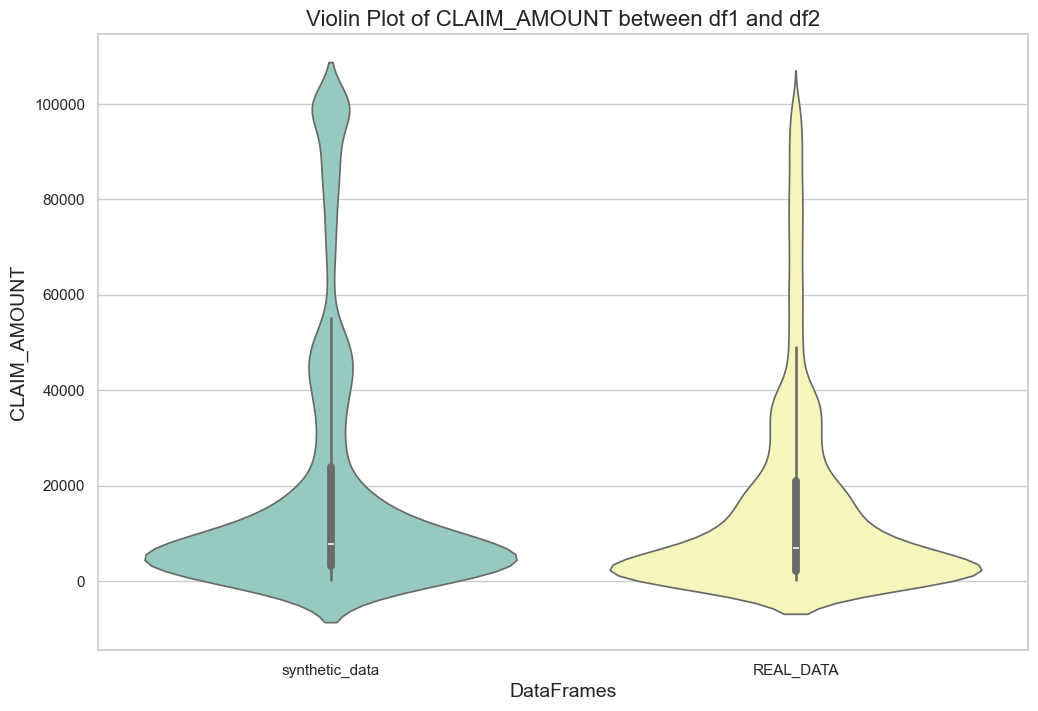

In [198]:
# Column to compare
column_to_compare = 'CLAIM_AMOUNT'

# Combine the data from both DataFrames
combined_data = pd.concat([synthetic_data_info[column_to_compare], info[column_to_compare]], axis=1)
combined_data.columns = ['synthetic_data', 'REAL_DATA']

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a violin plot
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.violinplot(data=combined_data, palette="Set3")

# Set the title and labels
plt.title(f"Violin Plot of {column_to_compare} between df1 and df2", fontsize=16)
plt.xlabel("DataFrames", fontsize=14)
plt.ylabel(column_to_compare, fontsize=14)

# Show the plot
plt.show()




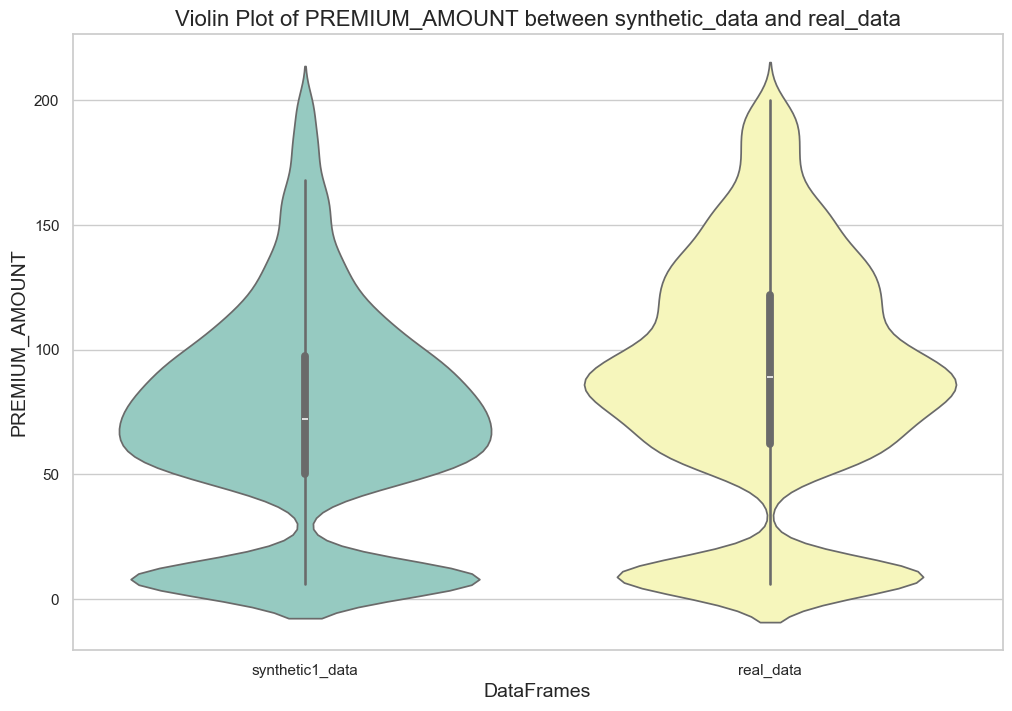

In [199]:
# Column to compare
column_to_compare = 'PREMIUM_AMOUNT'

# Combine the data from both DataFrames
combined_data = pd.concat([synthetic_data_info[column_to_compare], info[column_to_compare]], axis=1)
combined_data.columns = ['synthetic1_data', 'real_data']

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a violin plot
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.violinplot(data=combined_data, palette="Set3")

# Set the title and labels
plt.title(f"Violin Plot of {column_to_compare} between synthetic_data and real_data", fontsize=16)
plt.xlabel("DataFrames", fontsize=14)
plt.ylabel(column_to_compare, fontsize=14)

# Show the plot
plt.show()




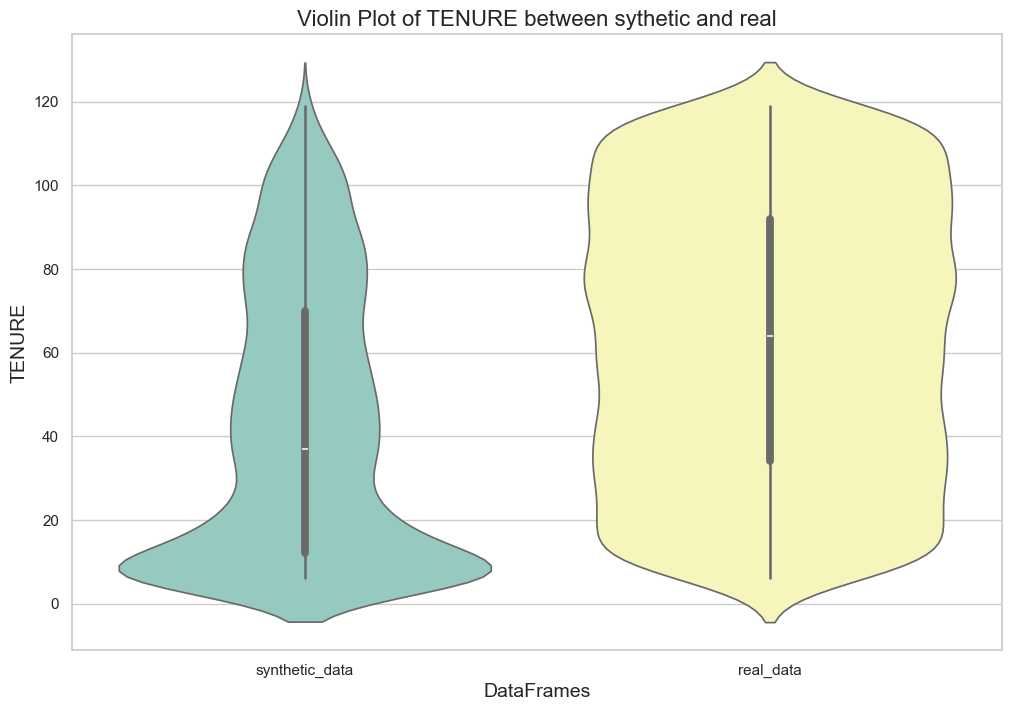

In [200]:
# Column to compare
column_to_compare = 'TENURE'

# Combine the data from both DataFrames
combined_data = pd.concat([synthetic_data_info[column_to_compare], info[column_to_compare]], axis=1)
combined_data.columns = ['synthetic_data', 'real_data']

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a violin plot
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.violinplot(data=combined_data, palette="Set3")

# Set the title and labels
plt.title(f"Violin Plot of {column_to_compare} between sythetic and real", fontsize=16)
plt.xlabel("DataFrames", fontsize=14)
plt.ylabel(column_to_compare, fontsize=14)

# Show the plot
plt.show()




In [201]:
misc

,CUSTOMER_ID,POLICY_NUMBER,CUSTOMER_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,SSN,ROUTING_NUMBER,ACCT_NUMBER,INCIDENT_STATE,INCIDENT_CITY,AGENT_ID,VENDOR_ID
0,A00003822,PLC00008468,Christopher Demarest,7701 West Saint John Road,#2010,Glendale,AZ,85308.0,087-11-1946,109134974.0,HXJP58258181908465,GA,Savannah,AGENT00413,VNDR00556
1,A00008149,PLC00009594,Ricardo Gatlin,8595 West 81st Drive,None,Arvada,CO,80005.0,685-33-3536,40125819.0,JUND46859540983731,AL,Montgomery,AGENT00769,VNDR00592
2,A00003172,PLC00007969,Lashawn Engles,637 Britannia Drive,None,Vallejo,CA,94591.0,378-36-0672,99513168.0,WGZZ90128415227650,CO,Grand Junction,AGENT00883,VNDR00031
3,A00007572,PLC00009292,Steven Bassett,2803 River Drive,None,Thunderbolt,GA,31404.0,669-92-1861,18429110.0,WIKE91555436351397,GA,Savannah,AGENT00278,VNDR00075
4,A00008173,PLC00000204,Jason Rodriguez,7573 National Drive,None,Livermore,CA,94550.0,703-40-1033,70752391.0,VYJW71311537294027,TN,Nashville,AGENT00636,VNDR00472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,A00006029,PLC00007245,Patrick Hauman,126 Marjorie Lane,C,Manchester,CT,6042.0,711-20-5046,89109346.0,FIDL48830187432471,CT,Manchester,AGENT00779,None
9996,A00003555,PLC00002590,Paula Noel,501 West Maple Street,#203,Fayetteville,AR,72701.0,069-65-6089,89666038.0,ZWBN24881448170175,MA,Worcester,AGENT00254,VNDR00598
9997,A00004230,PLC00006613,Luis Clark,10980 Splendor Loop,None,Anchorage,AK,99577.0,743-01-9480,34475591.0,ACXF69390753250566,OK,Oklahoma City,AGENT00786,VNDR00104
9998,A00006694,PLC00001781,Ryan Gordon,19 Heritage,None,Oakland,CA,94605.0,574-84-6660,59003728.0,QNEI58902443815498,AR,Fayetteville,AGENT00927,VNDR00185


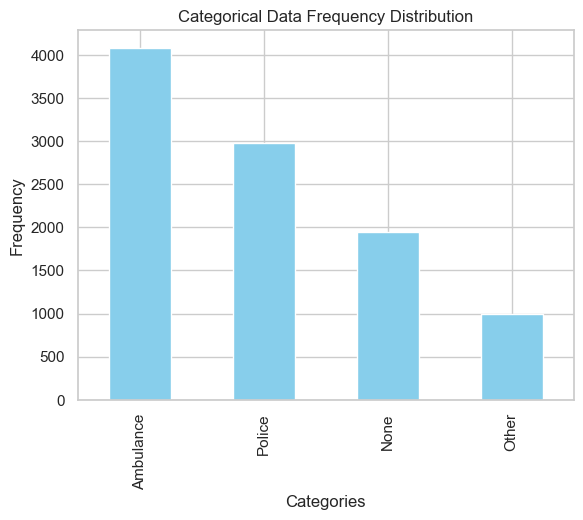

In [202]:

frequency_distribution = info['AUTHORITY_CONTACTED'].value_counts()
# Plotting the frequency distribution
frequency_distribution.plot(kind='bar', color='skyblue')
plt.title('Categorical Data Frequency Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()


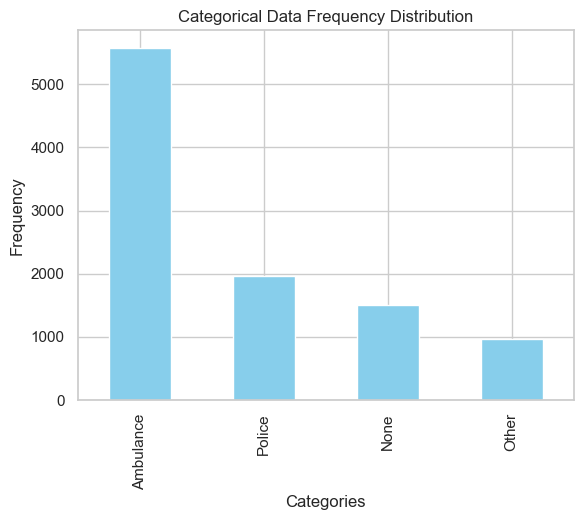

In [203]:

frequency_distribution = synthetic_data_info['AUTHORITY_CONTACTED'].value_counts()
# Plotting the frequency distribution
frequency_distribution.plot(kind='bar', color='skyblue')
plt.title('Categorical Data Frequency Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()


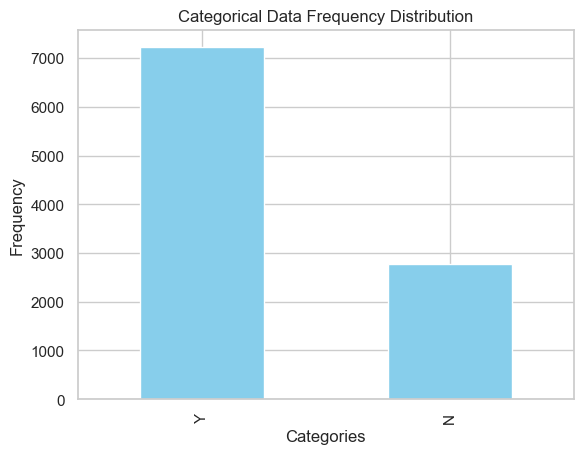

In [204]:
frequency_distribution = info['MARITAL_STATUS'].value_counts()
frequency_distribution.plot(kind='bar', color='skyblue')
plt.title('Categorical Data Frequency Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

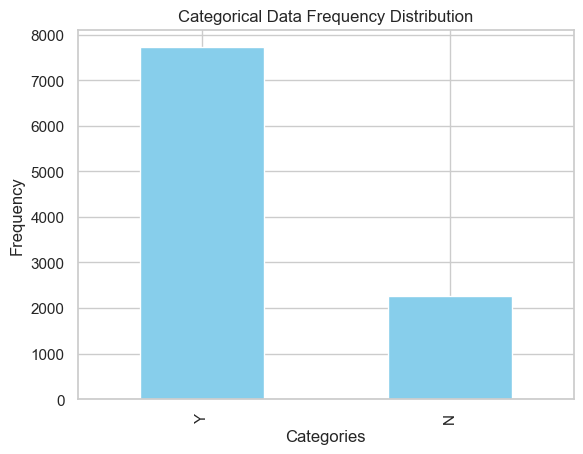

In [205]:
frequency_distribution = synthetic_data_info['MARITAL_STATUS'].value_counts()
frequency_distribution.plot(kind='bar', color='skyblue')
plt.title('Categorical Data Frequency Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

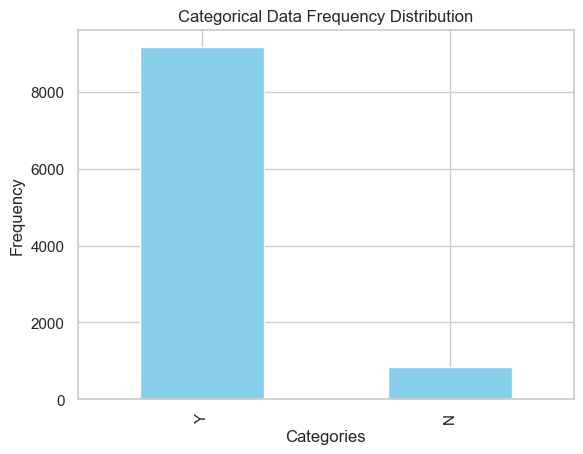

In [206]:
frequency_distribution = info['EMPLOYMENT_STATUS'].value_counts()
frequency_distribution.plot(kind='bar', color='skyblue')
plt.title('Categorical Data Frequency Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

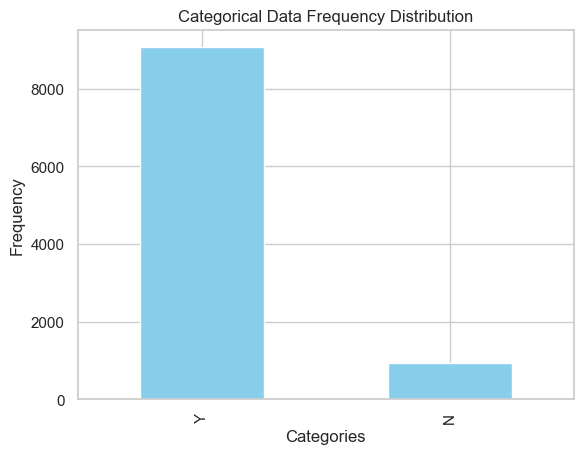

In [207]:
frequency_distribution = synthetic_data_info['EMPLOYMENT_STATUS'].value_counts()
frequency_distribution.plot(kind='bar', color='skyblue')
plt.title('Categorical Data Frequency Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

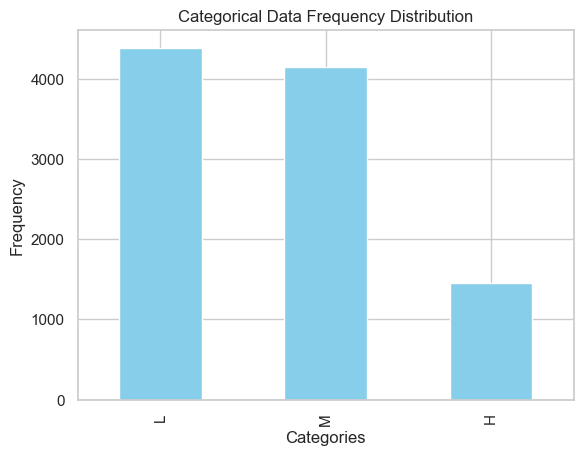

In [208]:
frequency_distribution = info['RISK_SEGMENTATION'].value_counts()
frequency_distribution.plot(kind='bar', color='skyblue')
plt.title('Categorical Data Frequency Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

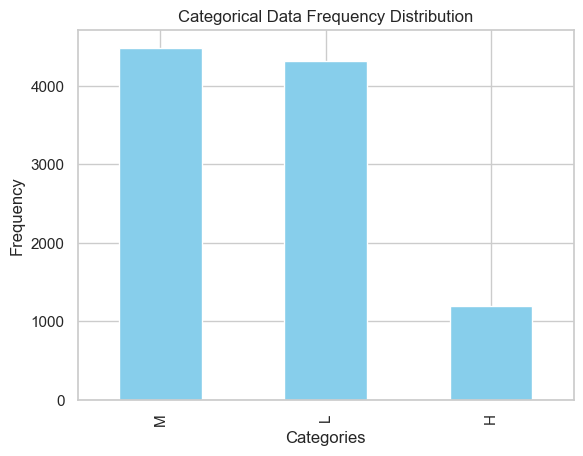

In [209]:
frequency_distribution = synthetic_data_info['RISK_SEGMENTATION'].value_counts()
frequency_distribution.plot(kind='bar', color='skyblue')
plt.title('Categorical Data Frequency Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

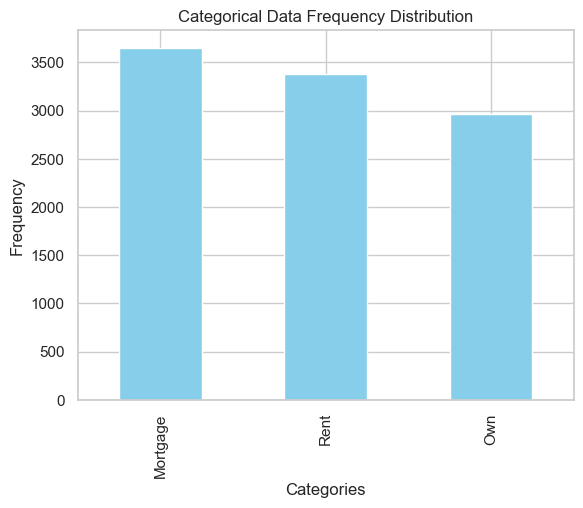

In [210]:
frequency_distribution = info['HOUSE_TYPE'].value_counts()
frequency_distribution.plot(kind='bar', color='skyblue')
plt.title('Categorical Data Frequency Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

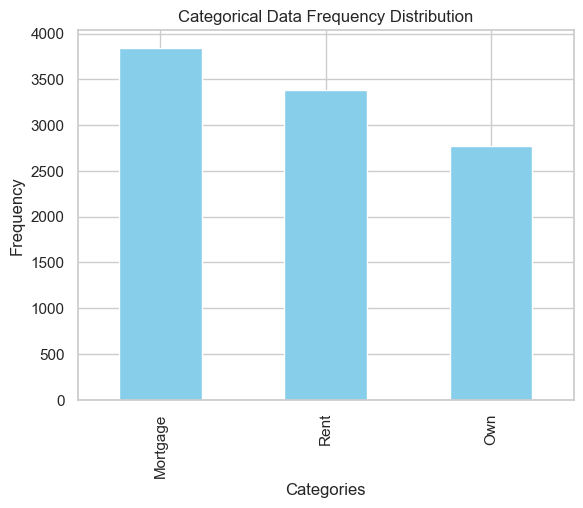

In [211]:
frequency_distribution = synthetic_data_info['HOUSE_TYPE'].value_counts()
frequency_distribution.plot(kind='bar', color='skyblue')
plt.title('Categorical Data Frequency Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

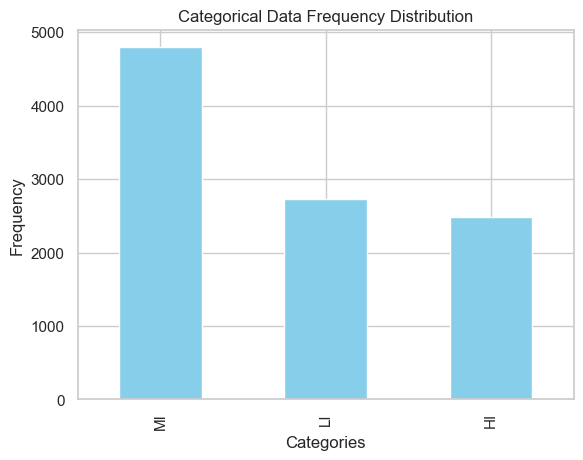

In [212]:
frequency_distribution = info['SOCIAL_CLASS'].value_counts()
frequency_distribution.plot(kind='bar', color='skyblue')
plt.title('Categorical Data Frequency Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

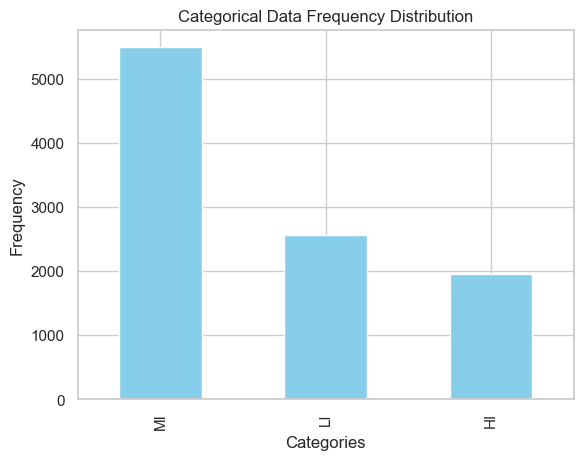

In [213]:
frequency_distribution = synthetic_data_info['SOCIAL_CLASS'].value_counts()
frequency_distribution.plot(kind='bar', color='skyblue')
plt.title('Categorical Data Frequency Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

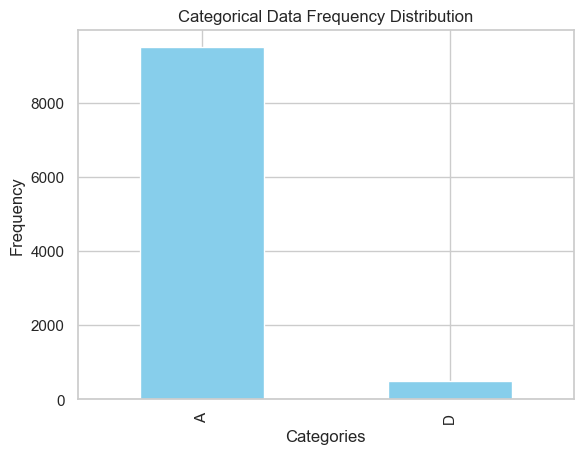

In [214]:
frequency_distribution = info['CLAIM_STATUS'].value_counts()
frequency_distribution.plot(kind='bar', color='skyblue')
plt.title('Categorical Data Frequency Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

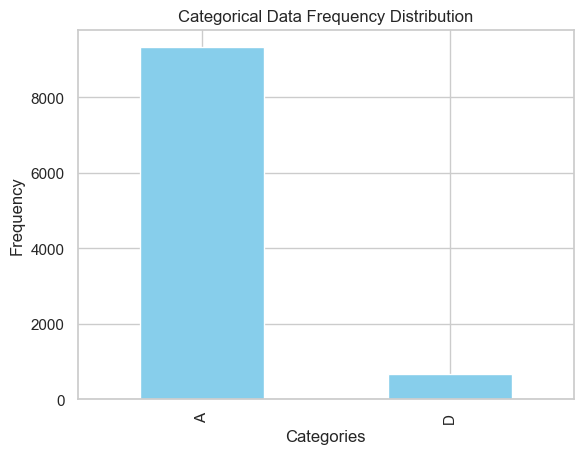

In [215]:
frequency_distribution = synthetic_data_info['CLAIM_STATUS'].value_counts()
frequency_distribution.plot(kind='bar', color='skyblue')
plt.title('Categorical Data Frequency Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

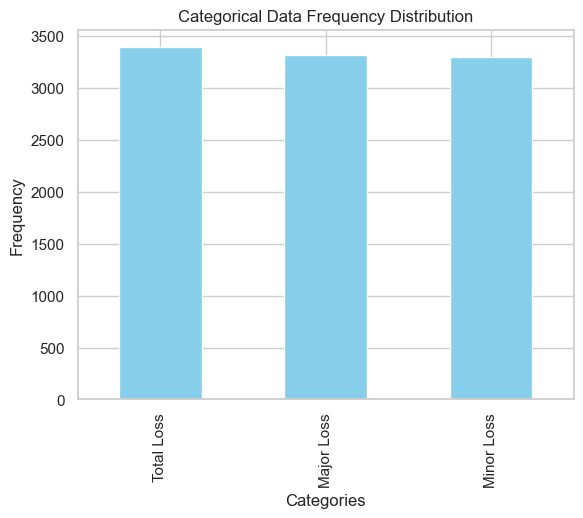

In [216]:
frequency_distribution = info['INCIDENT_SEVERITY'].value_counts()
frequency_distribution.plot(kind='bar', color='skyblue')
plt.title('Categorical Data Frequency Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

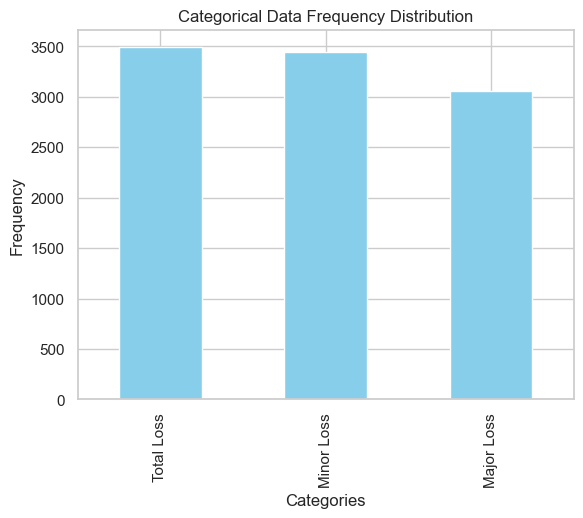

In [217]:
frequency_distribution = synthetic_data_info['INCIDENT_SEVERITY'].value_counts()
frequency_distribution.plot(kind='bar', color='skyblue')
plt.title('Categorical Data Frequency Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

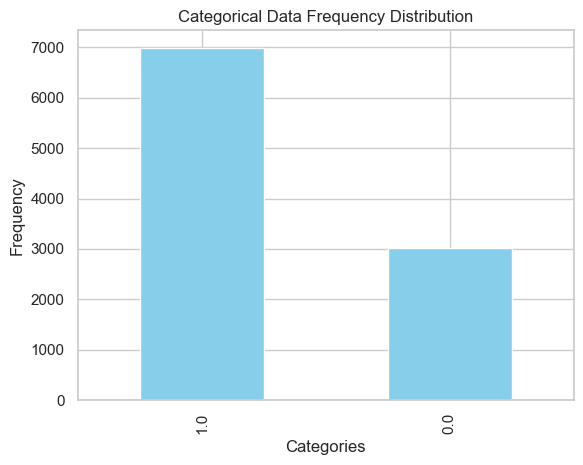

In [218]:
frequency_distribution = info['ANY_INJURY'].value_counts()
frequency_distribution.plot(kind='bar', color='skyblue')
plt.title('Categorical Data Frequency Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

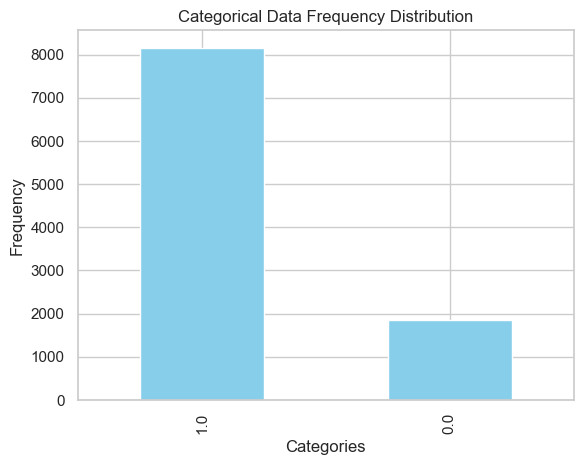

In [219]:
frequency_distribution = synthetic_data_info['ANY_INJURY'].value_counts()
frequency_distribution.plot(kind='bar', color='skyblue')
plt.title('Categorical Data Frequency Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

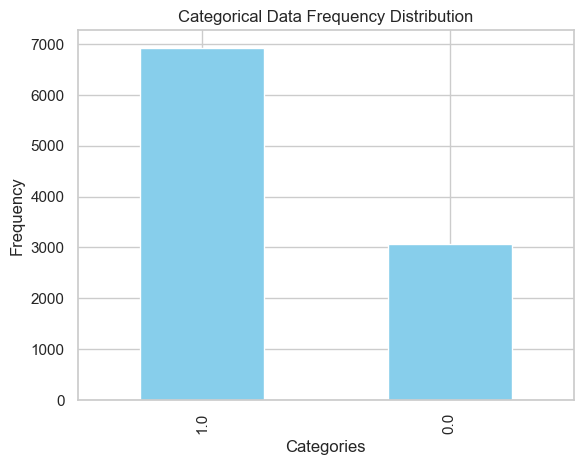

In [220]:
frequency_distribution = info['POLICE_REPORT_AVAILABLE'].value_counts()
frequency_distribution.plot(kind='bar', color='skyblue')
plt.title('Categorical Data Frequency Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

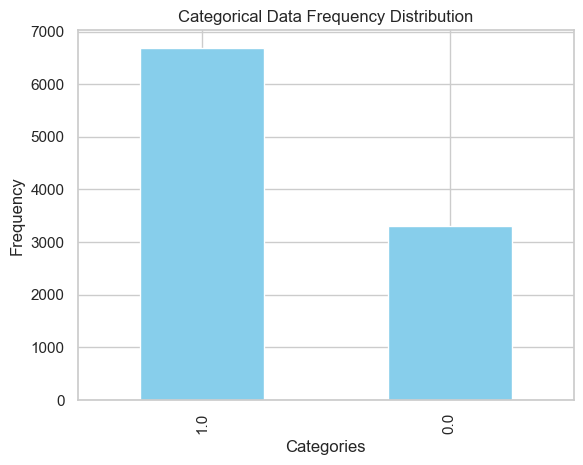

In [221]:
frequency_distribution = synthetic_data_info['POLICE_REPORT_AVAILABLE'].value_counts()
frequency_distribution.plot(kind='bar', color='skyblue')
plt.title('Categorical Data Frequency Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

In [222]:
ordinal_encoder = OrdinalEncoder()
encoded_df = synthetic_data_info
columns_to_encode = ['AUTHORITY_CONTACTED', 'EMPLOYMENT_STATUS','RISK_SEGMENTATION','HOUSE_TYPE','INCIDENT_SEVERITY','ANY_INJURY','POLICE_REPORT_AVAILABLE','CLAIM_STATUS','SOCIAL_CLASS']
encoded_df[columns_to_encode] = ordinal_encoder.fit_transform(encoded_df[columns_to_encode])
encoded_df

,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,...,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,CUSTOMER_EDUCATION_LEVEL,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_HOUR_OF_THE_DAY
0,2012-05-02,2020-10-05,2021-05-17,Life,95.35,35047,N,52,6,1.0,...,1.0,0.0,2.0,Masters,0.0,0.0,3.0,1.0,0.0,10
1,2010-12-06,2020-07-26,2020-11-24,Motor,55.26,1749,Y,59,37,1.0,...,1.0,0.0,1.0,Masters,0.0,1.0,0.0,1.0,1.0,14
2,2017-03-02,2021-04-15,2020-11-14,Travel,87.75,5972,Y,61,15,1.0,...,2.0,0.0,1.0,Bachelor,0.0,2.0,0.0,1.0,1.0,6
3,2018-02-12,2021-01-24,2020-08-04,Health,57.78,100,Y,46,16,1.0,...,2.0,1.0,2.0,Bachelor,0.0,2.0,0.0,1.0,0.0,14
4,2014-09-05,2020-06-08,2020-09-19,Mobile,11.37,15913,Y,45,53,1.0,...,1.0,0.0,1.0,Bachelor,0.0,1.0,0.0,0.0,1.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2016-08-11,2021-01-14,2020-12-02,Travel,157.27,2448,Y,59,108,1.0,...,1.0,2.0,0.0,Bachelor,0.0,2.0,1.0,0.0,0.0,13
9996,2015-02-04,2020-05-12,2020-06-19,Travel,89.28,3553,N,52,32,1.0,...,1.0,0.0,1.0,Masters,0.0,0.0,3.0,1.0,0.0,18
9997,2011-06-07,2021-04-19,2020-10-04,Life,56.80,1291,Y,56,24,1.0,...,2.0,2.0,2.0,Bachelor,0.0,1.0,3.0,0.0,0.0,21
9998,2014-02-19,2021-01-28,2020-10-02,Property,9.24,46057,Y,44,48,1.0,...,1.0,0.0,0.0,College,0.0,1.0,0.0,1.0,1.0,9


In [223]:
final =pd.DataFrame()
for ch in df2.columns:
    if ch in info.columns:
        final[ch] = info[ch]
    if ch in misc.columns:
        final[ch] = misc[ch]
final

,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,ADDRESS_LINE1,...,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID
0,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000.0,Christopher Demarest,7701 West Saint John Road,...,A,Major Loss,Police,0.0,1.0,GA,Savannah,4.0,AGENT00413,VNDR00556
1,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000.0,Ricardo Gatlin,8595 West 81st Drive,...,A,Total Loss,Ambulance,1.0,0.0,AL,Montgomery,0.0,AGENT00769,VNDR00592
2,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000.0,Lashawn Engles,637 Britannia Drive,...,A,Total Loss,Police,0.0,1.0,CO,Grand Junction,19.0,AGENT00883,VNDR00031
3,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000.0,Steven Bassett,2803 River Drive,...,A,Minor Loss,Ambulance,0.0,0.0,GA,Savannah,12.0,AGENT00278,VNDR00075
4,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000.0,Jason Rodriguez,7573 National Drive,...,A,Major Loss,Police,0.0,1.0,TN,Nashville,18.0,AGENT00636,VNDR00472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,A00006029,PLC00007245,2014-04-11,2021-06-25,2021-06-26,Motor,105.75,1000.0,Patrick Hauman,126 Marjorie Lane,...,A,Minor Loss,Ambulance,1.0,1.0,CT,Manchester,0.0,AGENT00779,None
9996,A00003555,PLC00002590,2015-08-25,2021-06-12,2021-06-17,Life,64.59,67000.0,Paula Noel,501 West Maple Street,...,A,Total Loss,Police,1.0,0.0,MA,Worcester,6.0,AGENT00254,VNDR00598
9997,A00004230,PLC00006613,2018-10-11,2021-06-18,2021-06-23,Health,183.50,8000.0,Luis Clark,10980 Splendor Loop,...,A,Major Loss,None,1.0,1.0,OK,Oklahoma City,12.0,AGENT00786,VNDR00104
9998,A00006694,PLC00001781,2016-01-29,2021-06-16,2021-06-21,Motor,113.46,2000.0,Ryan Gordon,19 Heritage,...,A,Total Loss,Ambulance,0.0,1.0,AR,Fayetteville,6.0,AGENT00927,VNDR00185


In [224]:
misc

,CUSTOMER_ID,POLICY_NUMBER,CUSTOMER_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,SSN,ROUTING_NUMBER,ACCT_NUMBER,INCIDENT_STATE,INCIDENT_CITY,AGENT_ID,VENDOR_ID
0,A00003822,PLC00008468,Christopher Demarest,7701 West Saint John Road,#2010,Glendale,AZ,85308.0,087-11-1946,109134974.0,HXJP58258181908465,GA,Savannah,AGENT00413,VNDR00556
1,A00008149,PLC00009594,Ricardo Gatlin,8595 West 81st Drive,None,Arvada,CO,80005.0,685-33-3536,40125819.0,JUND46859540983731,AL,Montgomery,AGENT00769,VNDR00592
2,A00003172,PLC00007969,Lashawn Engles,637 Britannia Drive,None,Vallejo,CA,94591.0,378-36-0672,99513168.0,WGZZ90128415227650,CO,Grand Junction,AGENT00883,VNDR00031
3,A00007572,PLC00009292,Steven Bassett,2803 River Drive,None,Thunderbolt,GA,31404.0,669-92-1861,18429110.0,WIKE91555436351397,GA,Savannah,AGENT00278,VNDR00075
4,A00008173,PLC00000204,Jason Rodriguez,7573 National Drive,None,Livermore,CA,94550.0,703-40-1033,70752391.0,VYJW71311537294027,TN,Nashville,AGENT00636,VNDR00472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,A00006029,PLC00007245,Patrick Hauman,126 Marjorie Lane,C,Manchester,CT,6042.0,711-20-5046,89109346.0,FIDL48830187432471,CT,Manchester,AGENT00779,None
9996,A00003555,PLC00002590,Paula Noel,501 West Maple Street,#203,Fayetteville,AR,72701.0,069-65-6089,89666038.0,ZWBN24881448170175,MA,Worcester,AGENT00254,VNDR00598
9997,A00004230,PLC00006613,Luis Clark,10980 Splendor Loop,None,Anchorage,AK,99577.0,743-01-9480,34475591.0,ACXF69390753250566,OK,Oklahoma City,AGENT00786,VNDR00104
9998,A00006694,PLC00001781,Ryan Gordon,19 Heritage,None,Oakland,CA,94605.0,574-84-6660,59003728.0,QNEI58902443815498,AR,Fayetteville,AGENT00927,VNDR00185


In [263]:
from sdv.single_table import TVAESynthesizer
metadata_misc  = SingleTableMetadata()
metadata_misc.detect_from_dataframe(data = misc)
metadata_misc

{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "primary_key": "CUSTOMER_ID",
    "columns": {
        "CUSTOMER_ID": {
            "sdtype": "id"
        },
        "POLICY_NUMBER": {
            "sdtype": "unknown",
            "pii": true
        },
        "CUSTOMER_NAME": {
            "sdtype": "unknown",
            "pii": true
        },
        "ADDRESS_LINE1": {
            "sdtype": "unknown",
            "pii": true
        },
        "ADDRESS_LINE2": {
            "sdtype": "categorical"
        },
        "CITY": {
            "sdtype": "categorical"
        },
        "STATE": {
            "sdtype": "categorical"
        },
        "POSTAL_CODE": {
            "sdtype": "numerical"
        },
        "SSN": {
            "sdtype": "unknown",
            "pii": true
        },
        "ROUTING_NUMBER": {
            "sdtype": "numerical"
        },
        "ACCT_NUMBER": {
            "sdtype": "unknown",
            "pii": true
        },
        "INCIDENT_STATE":

In [264]:
synthesizer_misc = TVAESynthesizer(
    metadata_misc, # required
    enforce_min_max_values=True,
    enforce_rounding=False,
    epochs=2
)

In [265]:
#metadata_misc.update_column(
 #   column_name='CUSTOMER_ID',
  #  sdtype='id',
   # regex_format='A[0-9]{8}'
#)
metadata_misc.update_column(
    column_name='ADDRESS_LINE1',
    sdtype='address',
    pii=True
)
metadata_misc.update_column(
    column_name='ADDRESS_LINE2',
    sdtype='address',
    pii=True
)
metadata_misc.update_column(
    column_name='CUSTOMER_NAME',
    sdtype='name',
    pii=True
)
metadata_misc.update_column(
    column_name='ACCT_NUMBER',
    sdtype='bban',
    pii=True
)
metadata_misc.update_column(
    column_name='POSTAL_CODE',
    sdtype='postcode',
)  
metadata_misc.update_column(
    column_name='CITY',
    sdtype='city',
    pii=True
)
metadata_misc.update_column(
    column_name='INCIDENT_STATE',
    sdtype='state',
    pii=True
)
metadata_misc.update_column(
    column_name='STATE',
    sdtype='state',
    pii=True
)    

In [266]:
metadata_misc

{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "primary_key": "CUSTOMER_ID",
    "columns": {
        "CUSTOMER_ID": {
            "sdtype": "id"
        },
        "POLICY_NUMBER": {
            "sdtype": "unknown",
            "pii": true
        },
        "CUSTOMER_NAME": {
            "sdtype": "name",
            "pii": true
        },
        "ADDRESS_LINE1": {
            "sdtype": "address",
            "pii": true
        },
        "ADDRESS_LINE2": {
            "sdtype": "address",
            "pii": true
        },
        "CITY": {
            "sdtype": "city",
            "pii": true
        },
        "STATE": {
            "sdtype": "state",
            "pii": true
        },
        "POSTAL_CODE": {
            "sdtype": "postcode"
        },
        "SSN": {
            "sdtype": "unknown",
            "pii": true
        },
        "ROUTING_NUMBER": {
            "sdtype": "numerical"
        },
        "ACCT_NUMBER": {
            "sdtype": "bban",
         

In [267]:
synthesizer_misc.auto_assign_transformers(misc)
synthesizer_misc.get_transformers()

{'CUSTOMER_ID': IDGenerator(prefix='sdv-id-'),
 'POLICY_NUMBER': AnonymizedFaker(function_name='bothify', function_kwargs={'text': 'sdv-pii-?????', 'letters': '0123456789abcdefghijklmnopqrstuvwxyz'}),
 'CUSTOMER_NAME': AnonymizedFaker(provider_name='person', function_name='name'),
 'ADDRESS_LINE1': AnonymizedFaker(provider_name='address', function_name='address'),
 'ADDRESS_LINE2': AnonymizedFaker(provider_name='address', function_name='address'),
 'CITY': AnonymizedFaker(provider_name='address', function_name='city'),
 'STATE': AnonymizedFaker(provider_name='address.en_US', function_name='state'),
 'POSTAL_CODE': AnonymizedFaker(provider_name='address.en_US', function_name='postcode'),
 'SSN': AnonymizedFaker(function_name='bothify', function_kwargs={'text': 'sdv-pii-?????', 'letters': '0123456789abcdefghijklmnopqrstuvwxyz'}),
 'ROUTING_NUMBER': FloatFormatter(enforce_min_max_values=True),
 'ACCT_NUMBER': AnonymizedFaker(provider_name='bank', function_name='bban'),
 'INCIDENT_STATE': 

In [268]:
synthesizer_misc.update_transformers(column_name_to_transformer={
    'CUSTOMER_ID': None
})
synthesizer_misc.update_transformers(column_name_to_transformer={
    'POLICY_NUMBER': None
})
synthesizer_misc.update_transformers(column_name_to_transformer={
    'POLICY_NUMBER': None
})
synthesizer_misc.update_transformers(column_name_to_transformer={
    'SSN': None
})

In [269]:
synthesizer_misc.fit(misc)

In [270]:
synthesizer_misc.save(
    filepath='synthesizer_misc.pkl'
)

In [271]:
synthesizer_misc.load(
    filepath='synthesizer_misc.pkl'
)

In [272]:
synthetic_data_misc = synthesizer_misc.sample(num_rows=number)

# save the data as a CSV
# synthetic_data.to_csv('synthetic_data.csv', index=False)

In [273]:
synthetic_data_misc

,CUSTOMER_ID,POLICY_NUMBER,CUSTOMER_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,SSN,ROUTING_NUMBER,ACCT_NUMBER,INCIDENT_STATE,INCIDENT_CITY,AGENT_ID,VENDOR_ID
0,sdv-id-0,PLC00003679,Jose Bautista,"49935 Christine Cliffs\nLake Angela, NM 06063","614 Hardy Fields Apt. 574\nWeissmouth, MS 61946",South Robert,Massachusetts,51975.0,837-84-7144,3.204125e+07,CPXS98942752443351,North Dakota,Arvada,AGENT00190,None
1,sdv-id-1,PLC00000153,Joshua Russell,"8973 Higgins Loop\nPort Jacob, NH 80379",USCGC Werner\nFPO AE 75101,North Shawntown,Delaware,19231.0,888-91-7552,2.022206e+07,MNQU65643359105976,New Jersey,Arvada,AGENT00379,None
2,sdv-id-2,PLC00002663,Timothy Garcia,"80169 Deanna Flats Apt. 204\nNorth Benjamin, N...","59655 Wright Field\nPort Melissa, FL 47520",Fuentesmouth,Indiana,22332.0,837-84-7144,1.682339e+07,MCPC75971129992198,California,Arvada,AGENT00977,None
3,sdv-id-3,PLC00009066,Joshua Lawrence,"87652 Lopez Views\nKimberlyland, MT 46803","7656 Allison Hills\nEast Justin, MS 74672",South Christopherborough,Montana,99941.0,837-84-7144,3.471912e+07,TBTT75062190767178,Wisconsin,Arvada,AGENT00381,None
4,sdv-id-4,PLC00006054,Sherry Orozco,"099 Wilkerson Streets\nMichaelchester, HI 47466","20869 Jill Pike Suite 562\nLake Jordan, WY 45379",New Kimberlyland,Connecticut,40589.0,686-50-2724,2.866160e+07,JTXL13387329061971,Massachusetts,Arvada,AGENT00977,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,sdv-id-9995,PLC00009877,Manuel Carter,"832 Sara Plains\nThomasmouth, MD 53413","PSC 7481, Box 8439\nAPO AA 77089",Palmerland,New Mexico,54873.0,837-84-7144,3.693406e+07,ETTI02903499599203,West Virginia,Arvada,AGENT00977,None
9996,sdv-id-9996,PLC00000828,Sandra Meyer,"0469 Hammond Cape\nClementshaven, AK 67351","81398 Larry Key Apt. 664\nFishermouth, IL 34526",West Sydneyborough,Kansas,21881.0,837-84-7144,3.711937e+07,YBVA61358492189928,Illinois,Arvada,AGENT00703,None
9997,sdv-id-9997,PLC00000153,Cassandra Ramirez,"51050 Kathy Light\nNorth Joseph, AS 57481","1035 Vicki Drives\nEast Elizabeth, SD 16555",Lake Margaret,Nebraska,84971.0,686-50-2724,3.738499e+07,ZXNI00328291679177,Louisiana,Arvada,AGENT00977,None
9998,sdv-id-9998,PLC00001412,Margaret Alvarez,"2844 Jeremy Ville\nWest Joseph, MP 98452","4697 Michael Grove\nGrossbury, KY 68514",Port Angela,Arizona,16410.0,686-50-2724,1.404472e+07,VHWD00404394765992,Kentucky,Arvada,AGENT00977,None


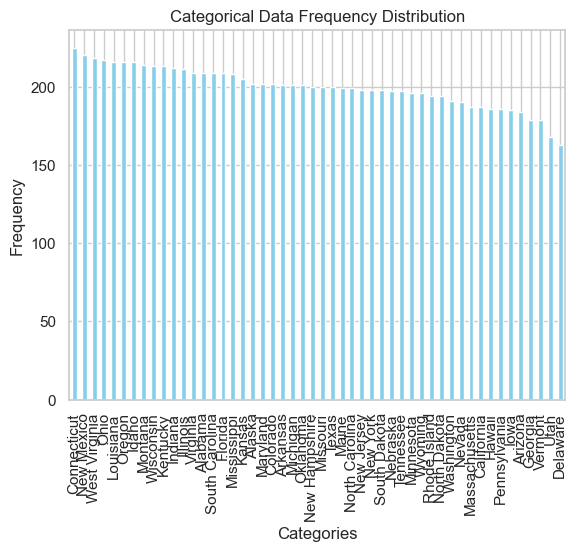

In [262]:
frequency_distribution = synthetic_data_misc['INCIDENT_STATE'].value_counts()
frequency_distribution.plot(kind='bar', color='skyblue')
plt.title('Categorical Data Frequency Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

In [ ]:
final =pd.DataFrame()
for ch in df2.columns:
    if ch in synthetic_data_info.columns:
        final[ch] = synthetic_data_info[ch]
    if ch in synthetic_data_misc.columns:
        final[ch] = synthetic_data_misc[ch]
final

In [ ]:
directory='outputs'
output_file_path = os.path.join(directory, 'synthetic1_data.csv')
# Save the DataFrame as a CSV file in the output directory
final.to_csv(output_file_path, index=False)